# LSTM层的状态量cell states与某些水文状态量之间的相关性分析

目的在于分析单变量和多变量模型的LSTM预测时候状态量的变化有何不同，这能一定程度地反映LSTM模型内部学习的规律。


## 分析思路

1. 本文设置的LSTM模型cell states共有256的单元，分析每个cell state与水文状态量之间的相关性，每个流域每个cell state有一个相关系数，每个cell state所有流域也能有一个相关系数。
2. 使用[《Hydrological Concept Formation inside Long Short-Term Memory (LSTM) networks》](https://doi.org/10.5194/hess-26-3079-2022)一文（以下简称Probe一文）中的Probe方法，来进一步分析单元状态和水文变量之间的相关性，其思路如下所述。

Probe一文中的图1如下所示：

![](../img/probe.png)

- (a,b) 利用训练好的LSTM逐时段前向计算获取到每个流域每个时段的cell states
- (c) 选择要分析的目标变量，例如蒸散发，每个流域逐时段值
- (d) 训练一个区域化（所有流域一起）的线性回归模型（以下简称某变量的probe或probe），输入为cell states，输出为目标变量，然后执行预测，并和观测进行比较

也就是说每个时段都有一个256单元组成的cell states，每个时段256个单元（cs）和一个水文变量（var）对应，所有流域所有时段的256个cs->所有流域所有时段的1个var，构建一个区域化的线性回归模型，训练期的数据训练这个模型，测试期的数据测试它。通过变量probe的预测和观测的比较来看cell states和目标变量之间的相关性。

这种模型解释也是很常用的方法之一，就是用一个简单的模型来还原隐含层变量和一些变量的相关性，讨论其中的规律。

本文重点分析单变量和多变量模型的区别，看单和多任务之间probe预测能力的差异，这能一定程度地反映多变量模型的可靠性。

这里先选择流域蒸散发，比多任务和单任务径流时候的256cs->流域时段蒸发et，这样来反映前后LSTM的变化。

同样也给出径流的cell states与观测及probe模型的相关分析。

这里还进一步补充和土壤含水量的相关分析，来作为检验多变量模型和单变量模型哪一种学习到的相关规律更合理的依据。

代码重点参考了：https://github.com/tommylees112/neuralhydrology/tree/pixel/notebooks

In [4]:
# 导入需要的模块
import os
import sys
from pathlib import Path

sys.path.append(os.path.dirname(Path(os.path.abspath("")).parent.parent))
import definitions
from hydroSPB.explore.probe_analysis import show_probe

## 单/多任务模型cell states和目标变量的相关分析

单任务学习和多任务学习模型比较，分别比较分析cell states和蒸散发以及径流的相关性，都是三个模型的比较，径流和蒸发两个单任务，一个多任务。

### cell states ~ ET

先来看看cell states和蒸散发之间的相关分析，下面exp410010是径流单任务学习模型，exp410130是径流蒸散发损失权重比1:1的多任务学习模型，exp42001是蒸散发的单任务模型

-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~ET basin-correlations and probe weights for camels/exp410010 --
-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~ET basin-correlations and probe weights for camels/exp410130 --
-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~ET basin-correlations and probe weights for camels/exp42001 --
-- Comparing cs~ET correlations for ['camels/exp410010', 'camels/exp410130', 'camels/exp42001'] --
-- Comparing cs~ET probe prediction metric Corr for ['camels/exp410010', 'camels/exp410130', 'camels/exp42001'] --


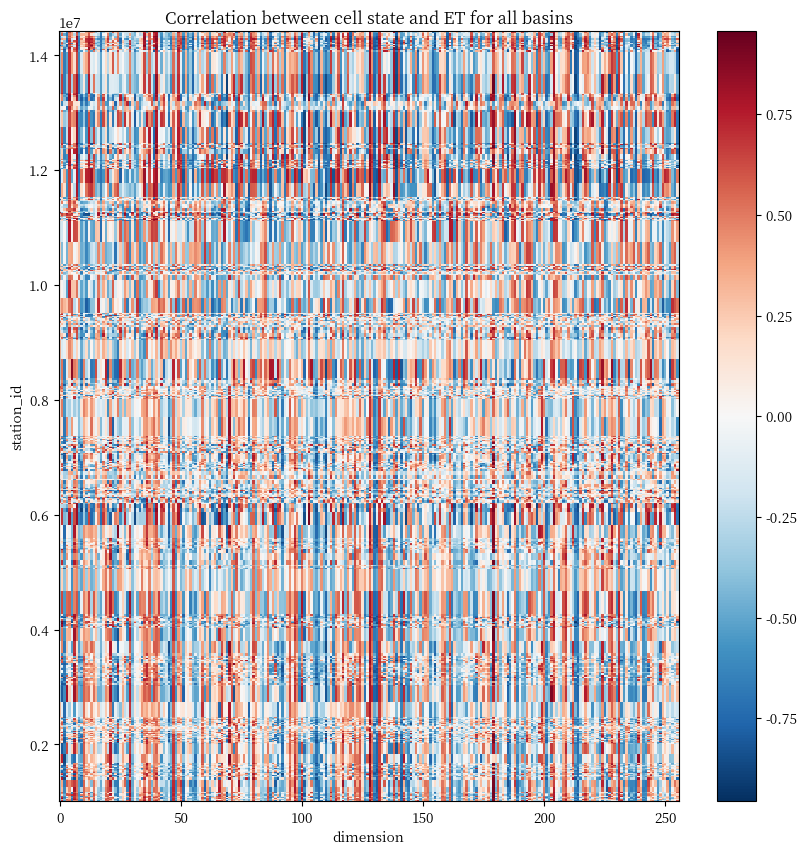

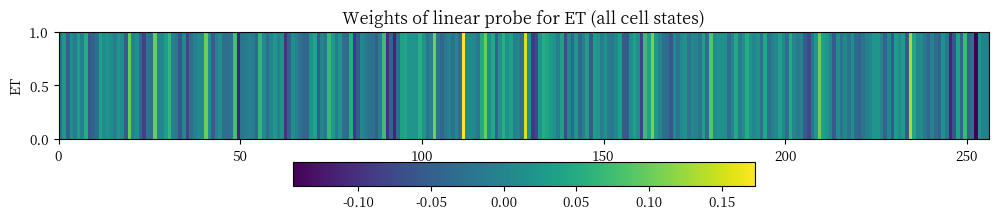

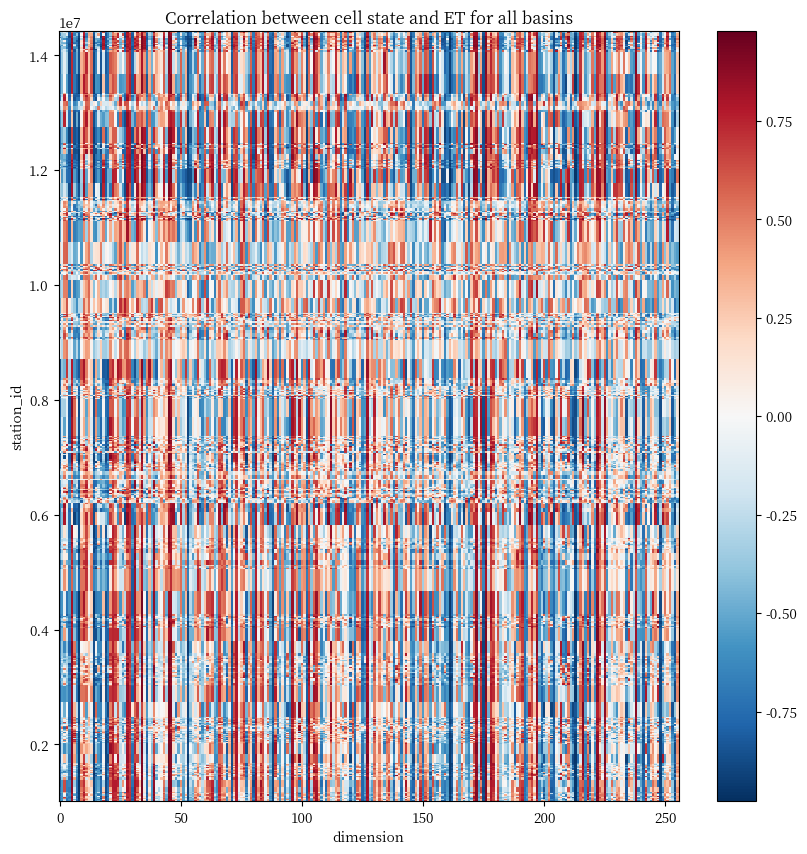

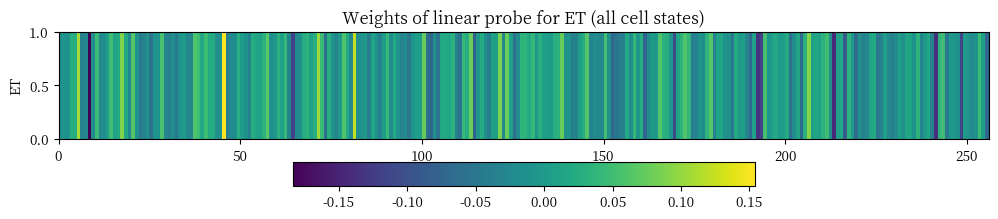

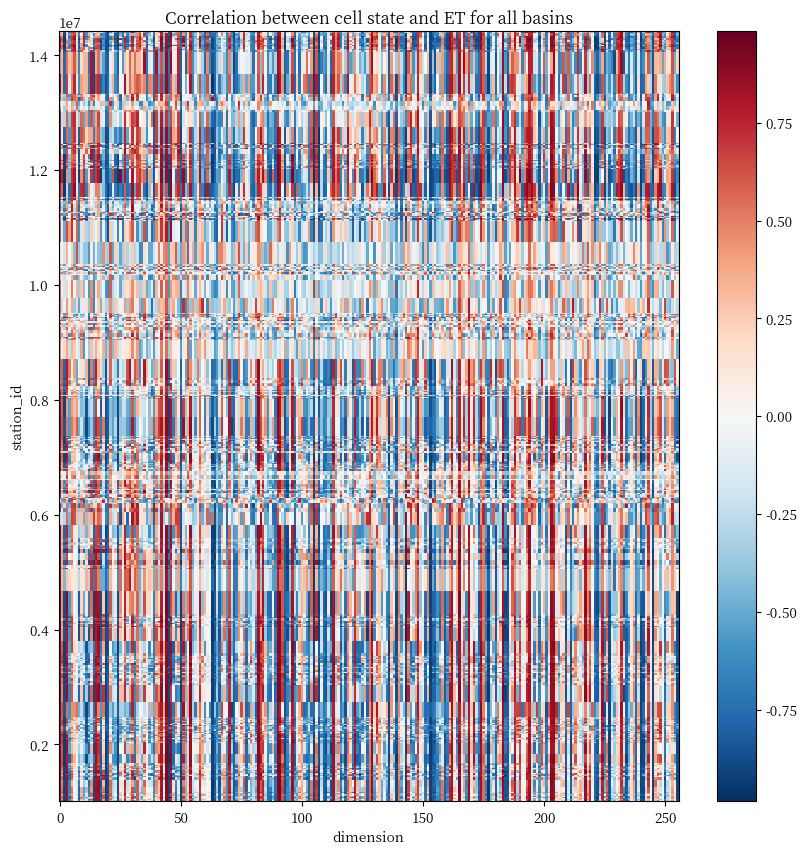

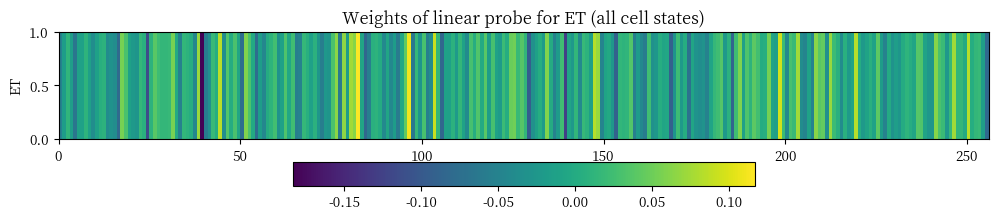

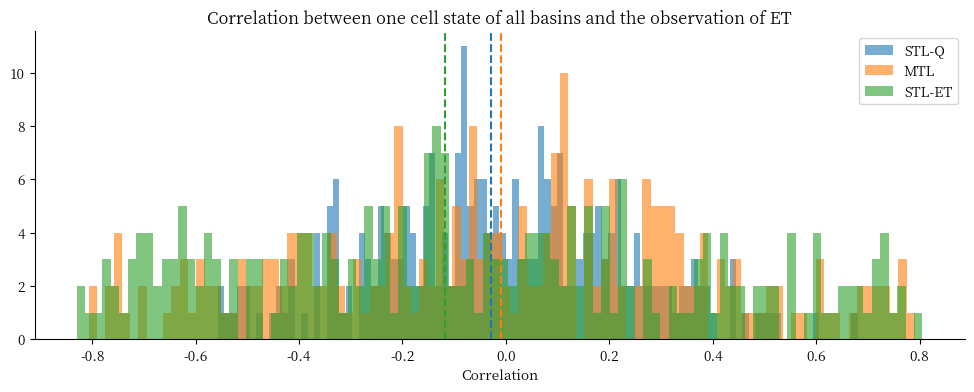

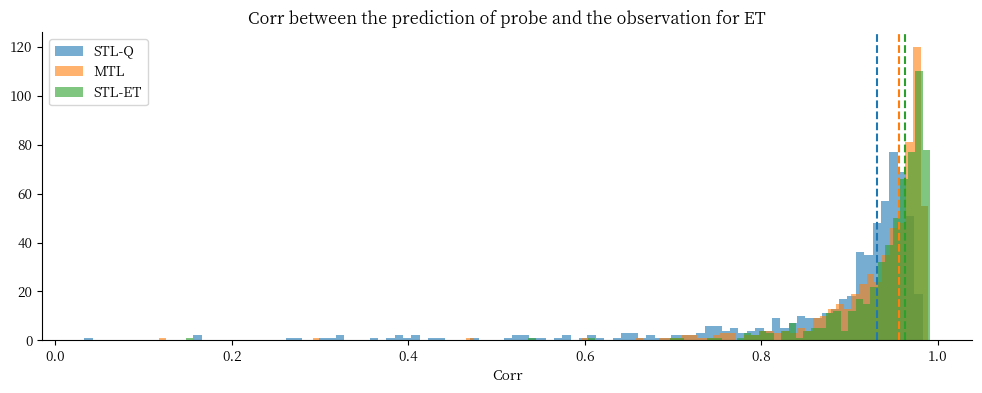

In [5]:
run_exp_lst = ["camels/exp410010", "camels/exp410130", "camels/exp42001"]
show_probe(
        run_exp_lst=run_exp_lst,
        var="ET",
        legend_lst=["STL-Q", "MTL", "STL-ET"],
        show_probe_metric="Corr",
        retrian_probe=[False, False, False],
        num_workers=4,
    )

### cell states ~ Q

再来看看cell states和径流之间的相关分析，模型和上一节是完全一样的。

-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~usgsFlow basin-correlations and probe weights for camels/exp410010 --
-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~usgsFlow basin-correlations and probe weights for camels/exp410130 --
-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~usgsFlow basin-correlations and probe weights for camels/exp42001 --
-- Comparing cs~usgsFlow correlations for ['camels/exp410010', 'camels/exp410130', 'camels/exp42001'] --
-- Comparing cs~usgsFlow probe prediction metric Corr for ['camels/exp410010', 'camels/exp410130', 'camels/exp42001'] --


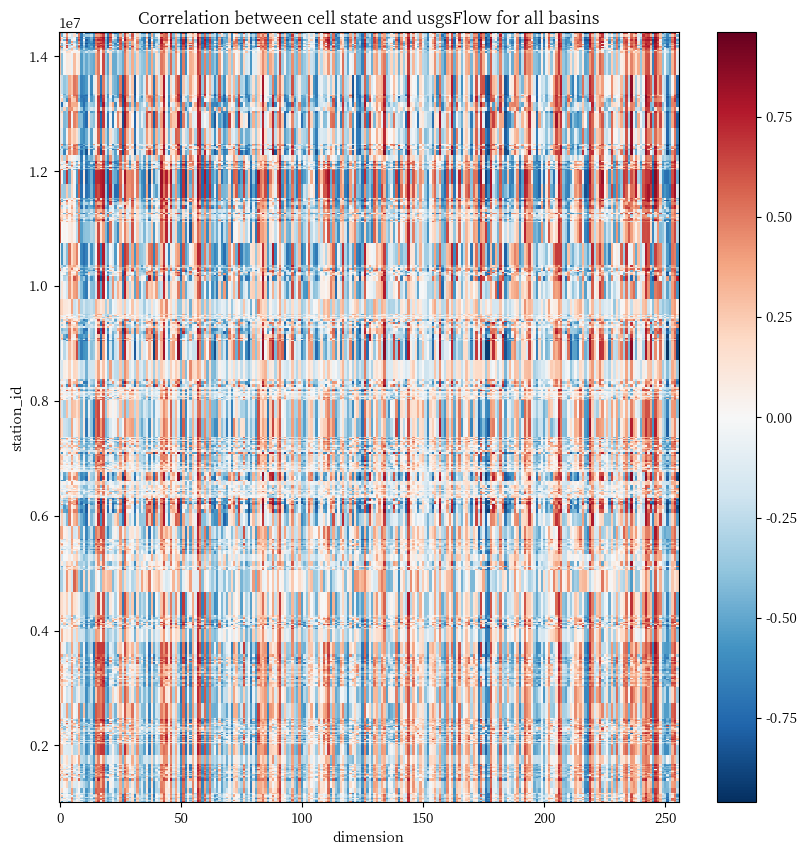

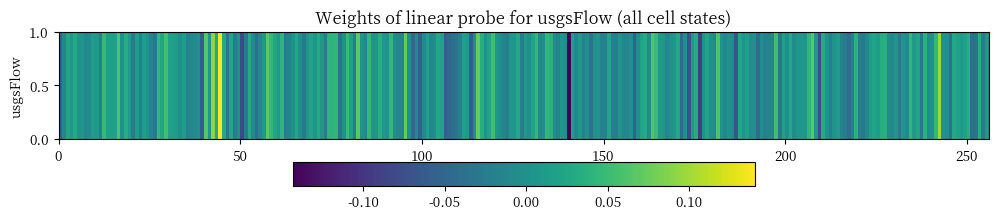

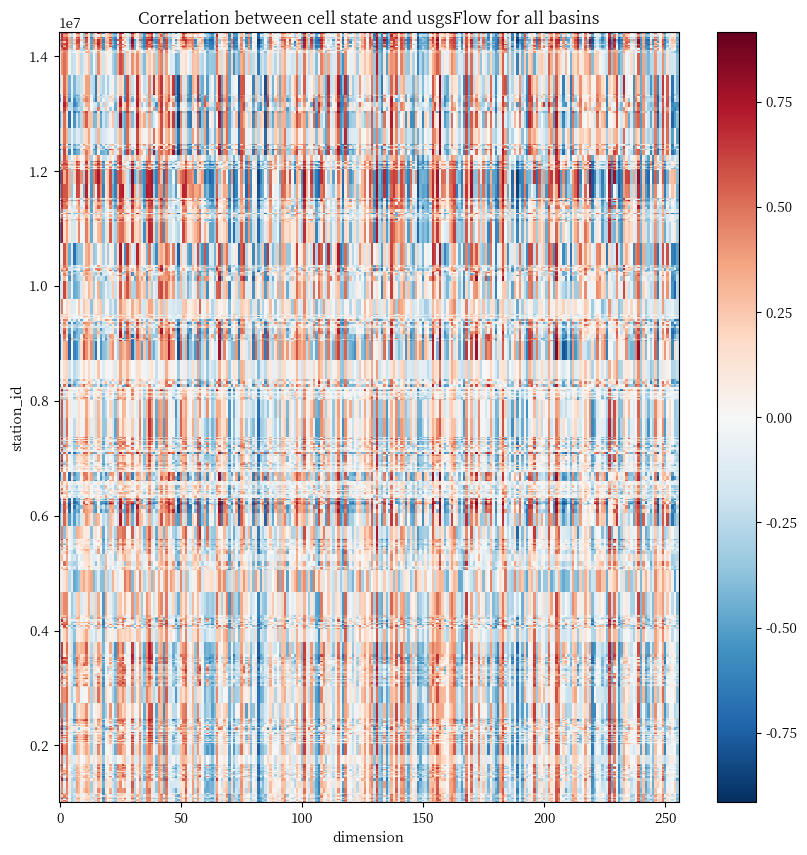

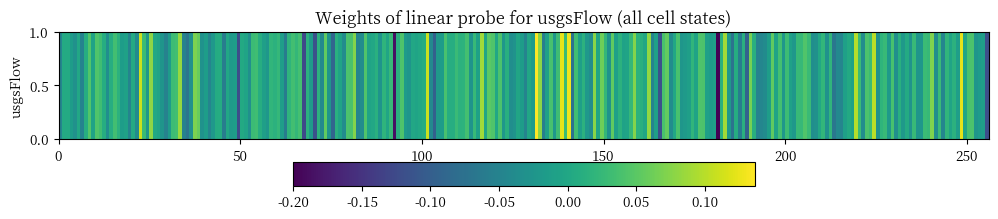

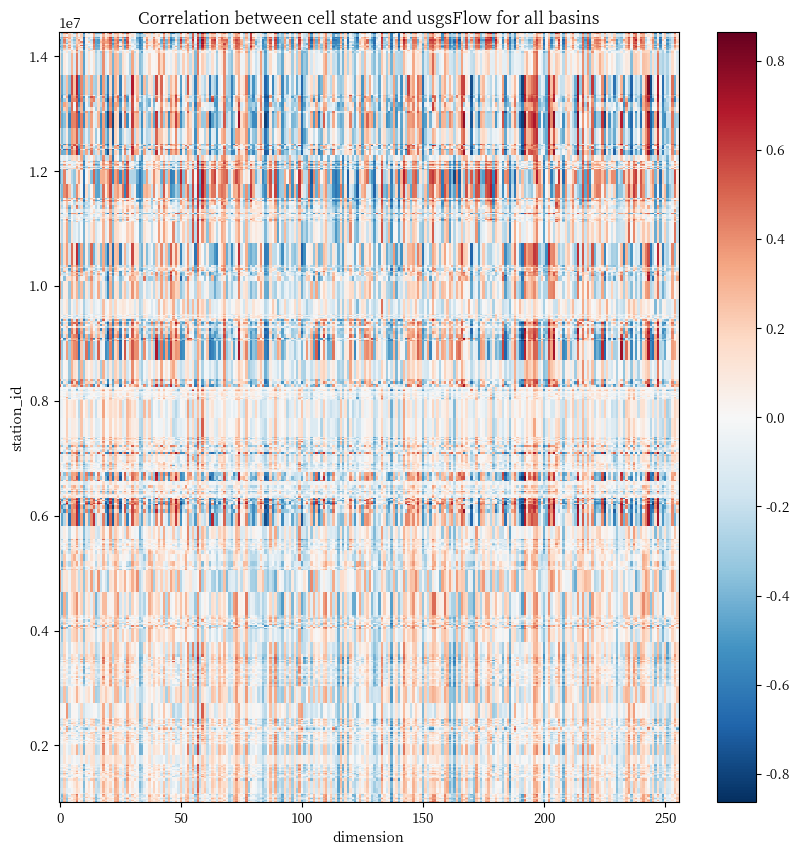

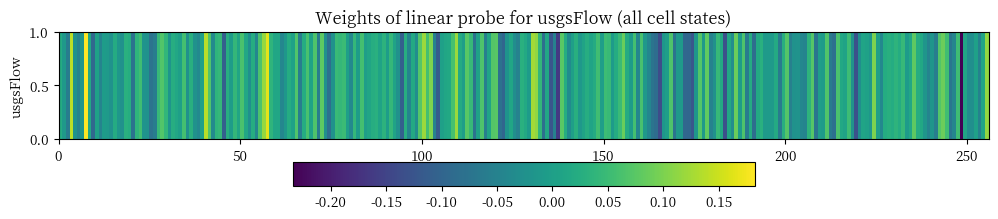

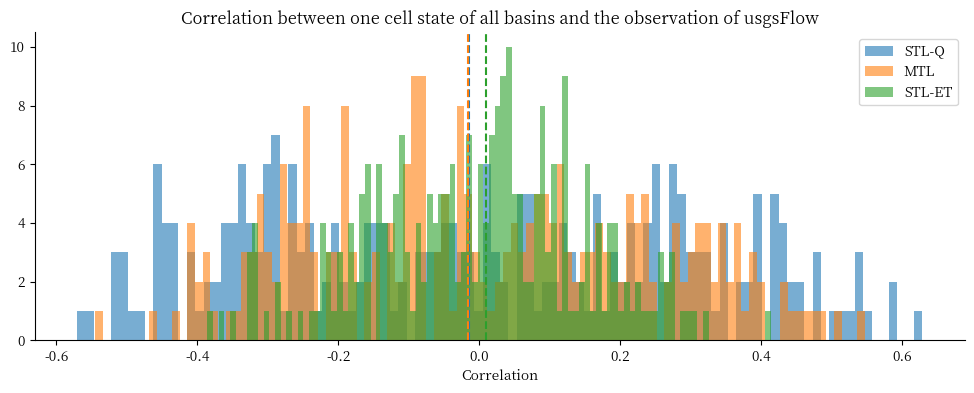

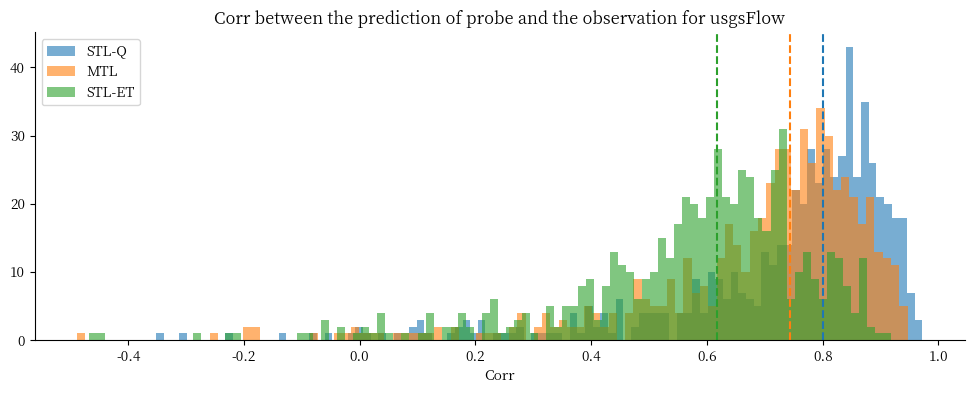

In [6]:
run_exp_lst = ["camels/exp410010", "camels/exp410130", "camels/exp42001"]
show_probe(
        run_exp_lst=run_exp_lst,
        var="usgsFlow",
        legend_lst=["STL-Q", "MTL", "STL-ET"],
        show_probe_metric="Corr",
        retrian_probe=[False, False, False],
        num_workers=4,
    )

## 蒸散发单/多任务模型cell states和第三方变量--土壤含水量的相关分析

-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~ssm basin-correlations and probe weights for camels/exp410010 --
-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~ssm basin-correlations and probe weights for camels/exp410130 --
-- Running RAW Correlations --
-- Get Probe Predictions --
-- Get metrics of probe predictions --
-- Extracting probe's weights and biases --
-- Plotting cs~ssm basin-correlations and probe weights for camels/exp42001 --
-- Comparing cs~ssm correlations for ['camels/exp410010', 'camels/exp410130', 'camels/exp42001'] --
-- Comparing cs~ssm probe prediction metric Corr for ['camels/exp410010', 'camels/exp410130', 'camels/exp42001'] --


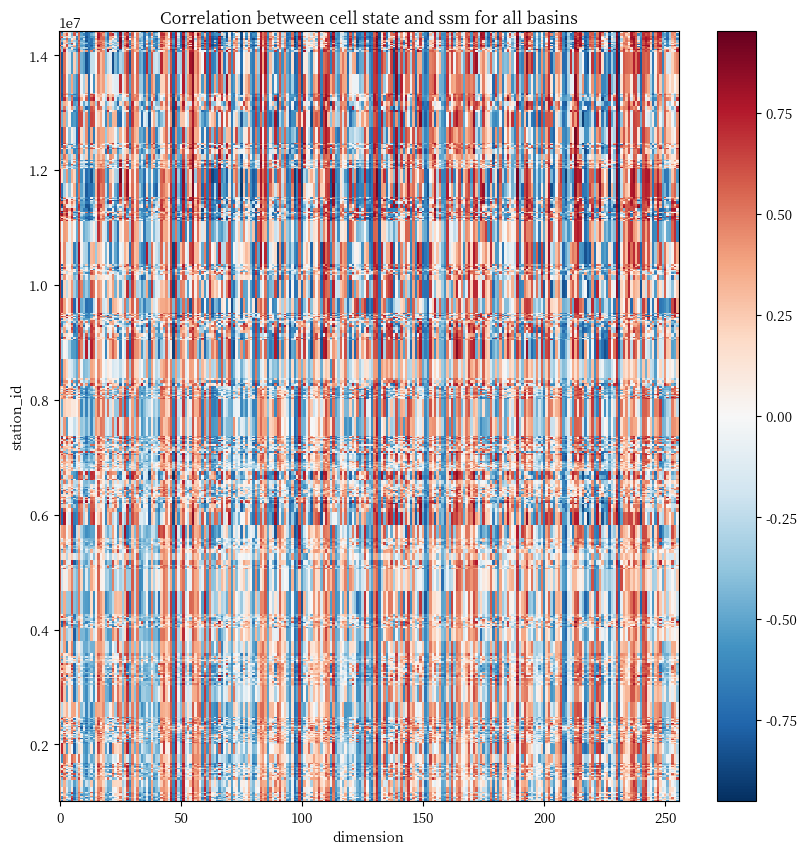

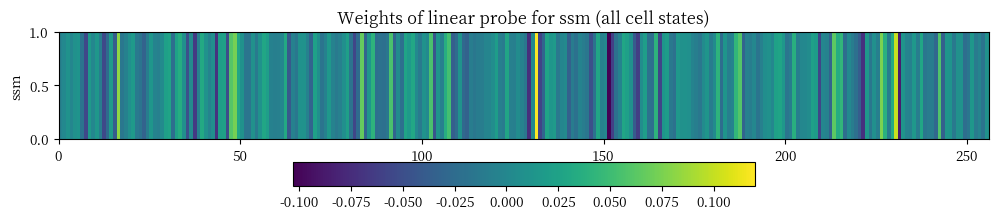

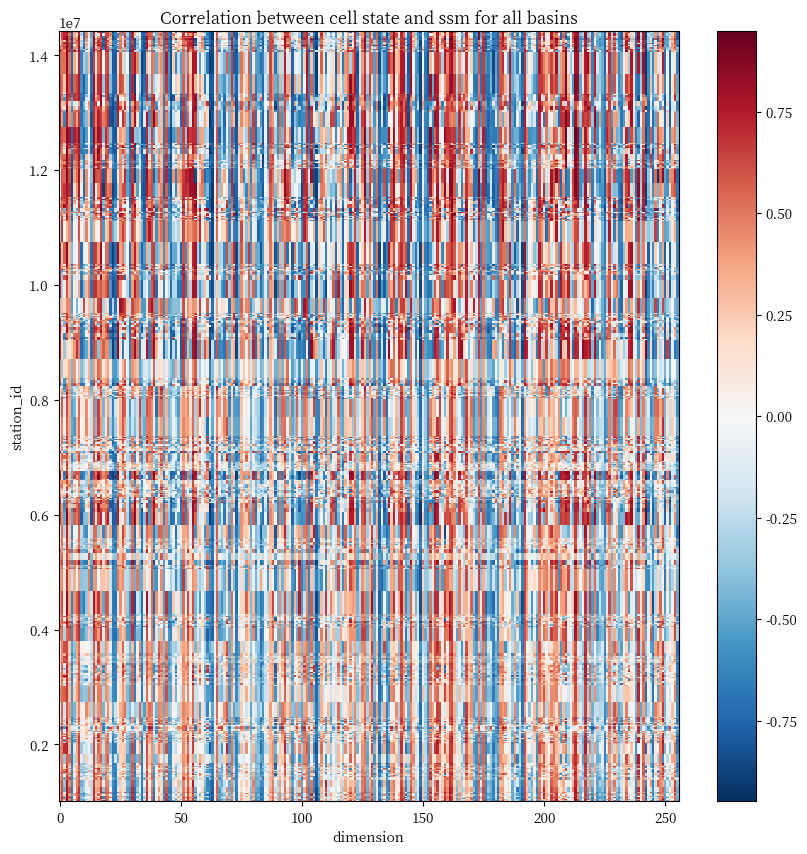

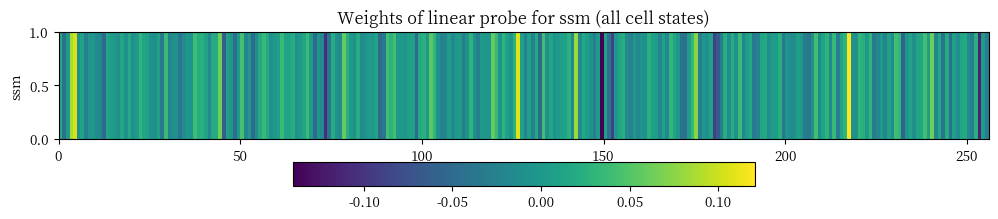

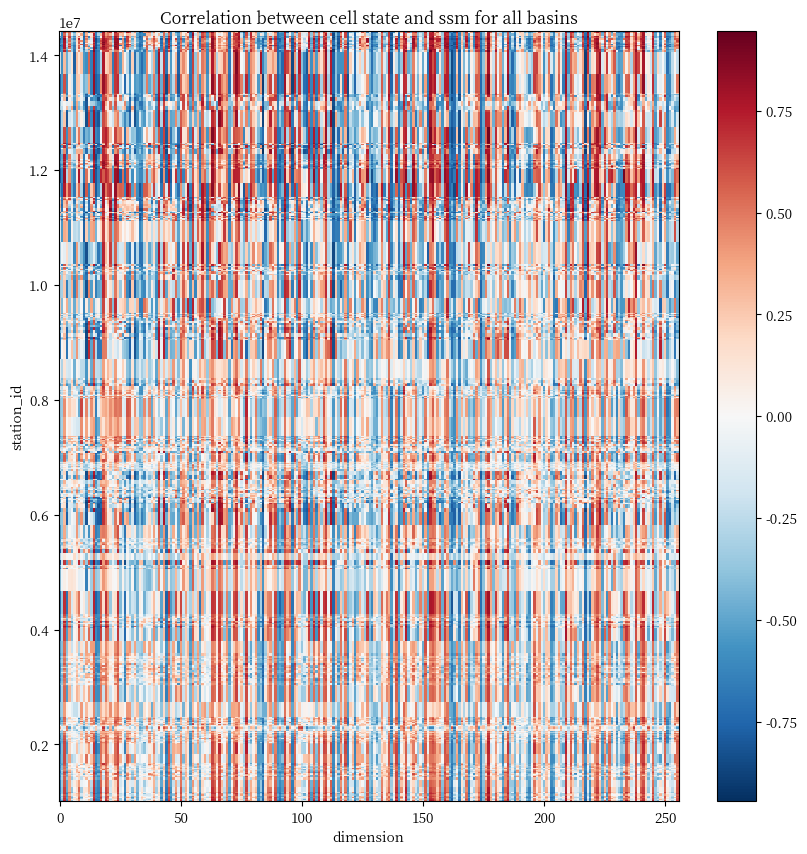

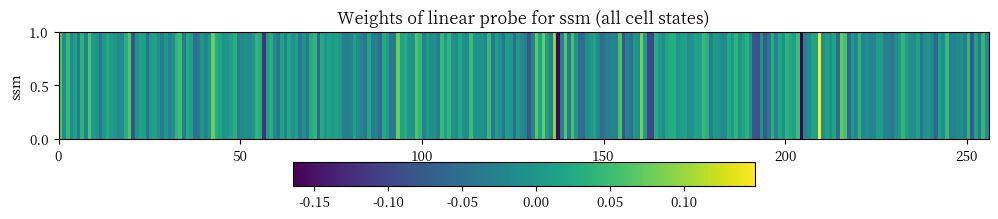

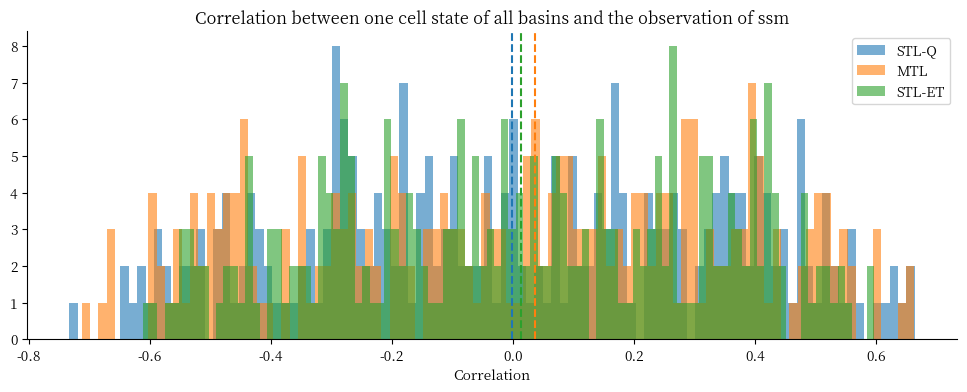

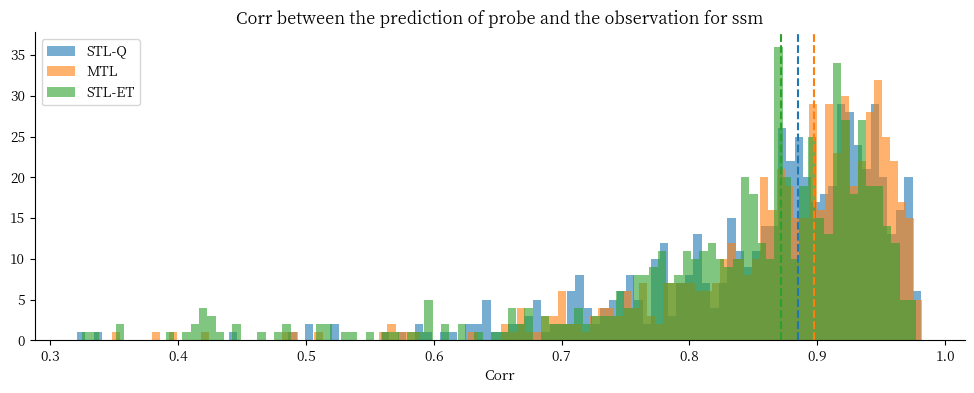

In [7]:
run_exp_lst = ["camels/exp410010", "camels/exp410130", "camels/exp42001"]
show_probe(
        run_exp_lst=run_exp_lst,
        var="ssm",
        legend_lst=["STL-Q", "MTL", "STL-ET"],
        show_probe_metric="Corr",
        retrian_probe=[False, False, False],
        num_workers=4,
    )